In [1]:
from mtcnn.mtcnn import MTCNN
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = keras.models.load_model('wights.h5',compile=False)

In [3]:
label_map={0: 'angry',
 1: 'disgusted',
 2: 'fearful',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised'}

In [4]:
def color(col):
    if col=='sad':
        return (42,59,144)
    elif col=='fearful':
        return (101, 155, 246)
    elif col=='happy':
        return (0, 255, 255)
    elif col=='angry':
        return (106, 39, 225)
    elif col=='disgusted':
        return (154,205,50)
    elif col=='neutral':
        return (238, 238, 238)
    elif col=='surprised':
        return (34, 231, 34)

In [5]:
def predict(path):
    pic =cv.imread(path)
    detector = MTCNN()
    # detect faces in the image
    pic = cv.resize(pic,(870,870))
    faces = detector.detect_faces(pic)
    gray = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
    for face in faces:
        x, y, w, h = face['box']
        crop=gray[y:y+h,x:x+w]
        if(type(faces)!=tuple):
            img = cv.resize(crop,(48,48))
            image=img_to_array(img).reshape(-1,48,48,1)
            image = image/255 
            predict=model.predict(image)
            predict=np.argmax(predict,axis = 1)
            cv.rectangle(pic, (x, y), (x+w, y+h), color(label_map[predict[0]]), 2)
            cv.putText(pic,label_map[predict[0]],(x-10, y-10),cv.FONT_HERSHEY_PLAIN,2,color(label_map[predict[0]]),2) 
    # Display the output image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv.cvtColor(pic, cv.COLOR_BGR2RGB))

1/1 [==============================] - 0s 40ms/step


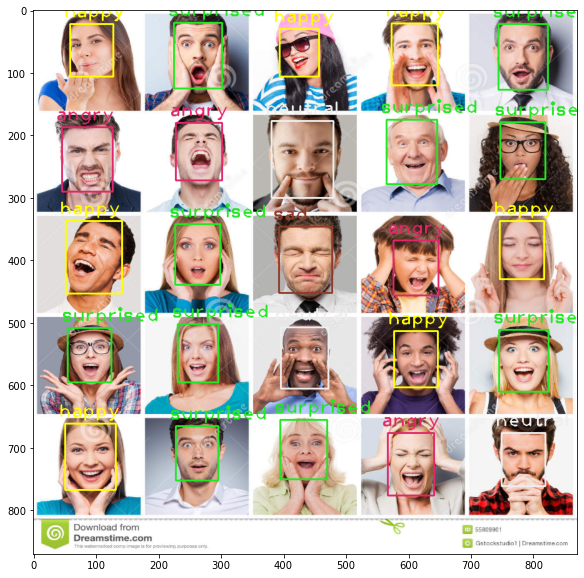

In [6]:
predict('some peolpe emotion.jpg')

1/1 [==============================] - 0s 41ms/step


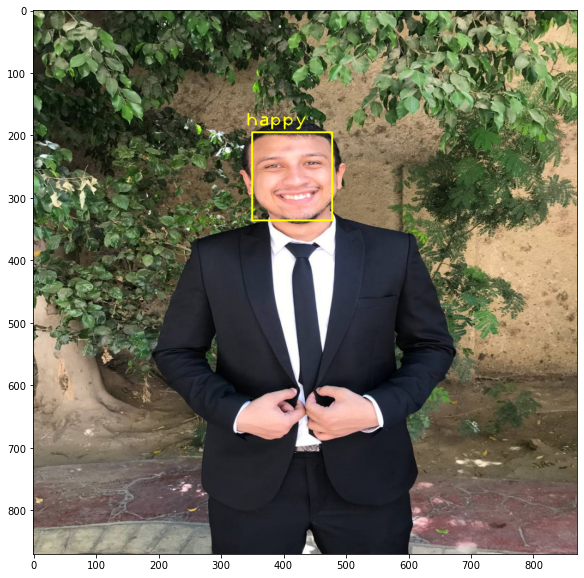

In [7]:
predict('me.jpeg')